In [1]:
"""
基于FFT计算重力梯度张量
"""
import matplotlib.pyplot as plt
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, pftrans, giutils
from geoist.vis import giplt


In [2]:
#模型设置
model = [geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': 100})]
area = (-5000, 5000, -5000, 5000)
shape = (51, 51)
z0 = -500
#格网划分
xp, yp, zp = gridder.regular(area, shape, z=z0)

In [3]:
#正演及添加噪声
gz = giutils.contaminate(prism.gz(xp, yp, zp, model), 0.001)

In [4]:
#重力梯度计算及单位转换 gz to SI units so that the result can be converted to Eotvos
gxz = giutils.si2eotvos(pftrans.derivx(xp, yp, giutils.mgal2si(gz), shape))
gyz = giutils.si2eotvos(pftrans.derivy(xp, yp, giutils.mgal2si(gz), shape))
gzz = giutils.si2eotvos(pftrans.derivz(xp, yp, giutils.mgal2si(gz), shape))

In [5]:
#正演重力梯度
gxz_true = prism.gxz(xp, yp, zp, model)
gyz_true = prism.gyz(xp, yp, zp, model)
gzz_true = prism.gzz(xp, yp, zp, model)

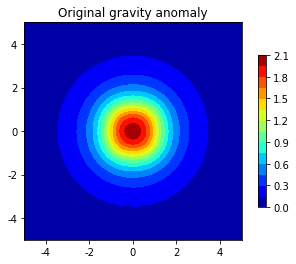

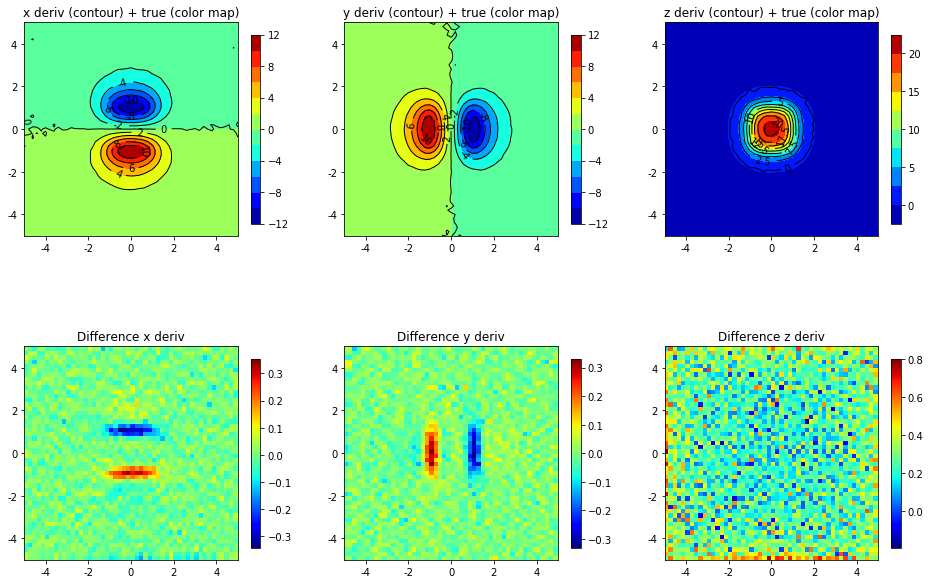

In [6]:
#画图
plt.figure()
plt.title("Original gravity anomaly")
plt.axis('scaled')
giplt.contourf(xp, yp, gz, shape, 15)
plt.colorbar(shrink=0.7)
giplt.m2km()

plt.figure(figsize=(14, 10))
plt.subplots_adjust(top=0.95, left=0.05, right=0.95)
plt.subplot(2, 3, 1)
plt.title("x deriv (contour) + true (color map)")
plt.axis('scaled')
levels = giplt.contourf(yp, xp, gxz_true, shape, 12)
plt.colorbar(shrink=0.7)
giplt.contour(yp, xp, gxz, shape, 12, color='k')
giplt.m2km()
plt.subplot(2, 3, 2)
plt.title("y deriv (contour) + true (color map)")
plt.axis('scaled')
levels = giplt.contourf(yp, xp, gyz_true, shape, 12)
plt.colorbar(shrink=0.7)
giplt.contour(yp, xp, gyz, shape, 12, color='k')
giplt.m2km()
plt.subplot(2, 3, 3)
plt.title("z deriv (contour) + true (color map)")
plt.axis('scaled')
levels = giplt.contourf(yp, xp, gzz_true, shape, 8)
plt.colorbar(shrink=0.7)
giplt.contour(yp, xp, gzz, shape, levels, color='k')
giplt.m2km()
plt.subplot(2, 3, 4)
plt.title("Difference x deriv")
plt.axis('scaled')
giplt.pcolor(yp, xp, (gxz_true - gxz), shape)
plt.colorbar(shrink=0.7)
giplt.m2km()
plt.subplot(2, 3, 5)
plt.title("Difference y deriv")
plt.axis('scaled')
giplt.pcolor(yp, xp, (gyz_true - gyz), shape)
plt.colorbar(shrink=0.7)
giplt.m2km()
plt.subplot(2, 3, 6)
plt.title("Difference z deriv")
plt.axis('scaled')
giplt.pcolor(yp, xp, (gzz_true - gzz), shape)
plt.colorbar(shrink=0.7)
giplt.m2km()
plt.show()